In [1]:
!pip install networkx matplotlib

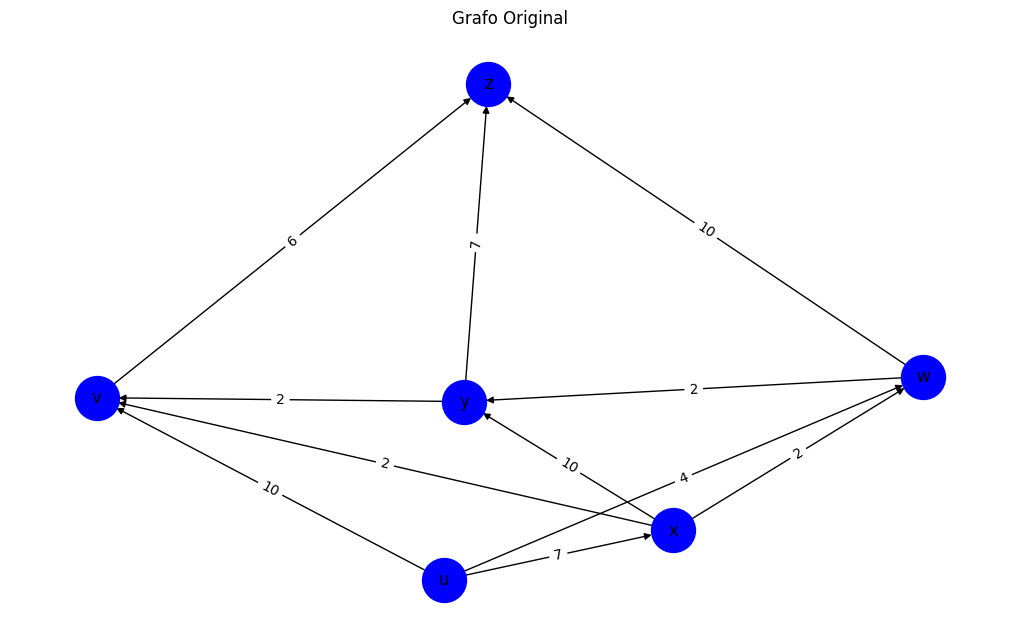

Flujo máximo total desde el puerto U hasta Z: 17 unidades

Rutas marítimas utilizadas con cantidad de mercancías:
Ruta u → w: 4 unidades
Ruta u → x: 7 unidades
Ruta u → v: 6 unidades
Ruta w → z: 6 unidades
Ruta x → w: 2 unidades
Ruta x → y: 5 unidades
Ruta v → z: 6 unidades
Ruta y → z: 5 unidades


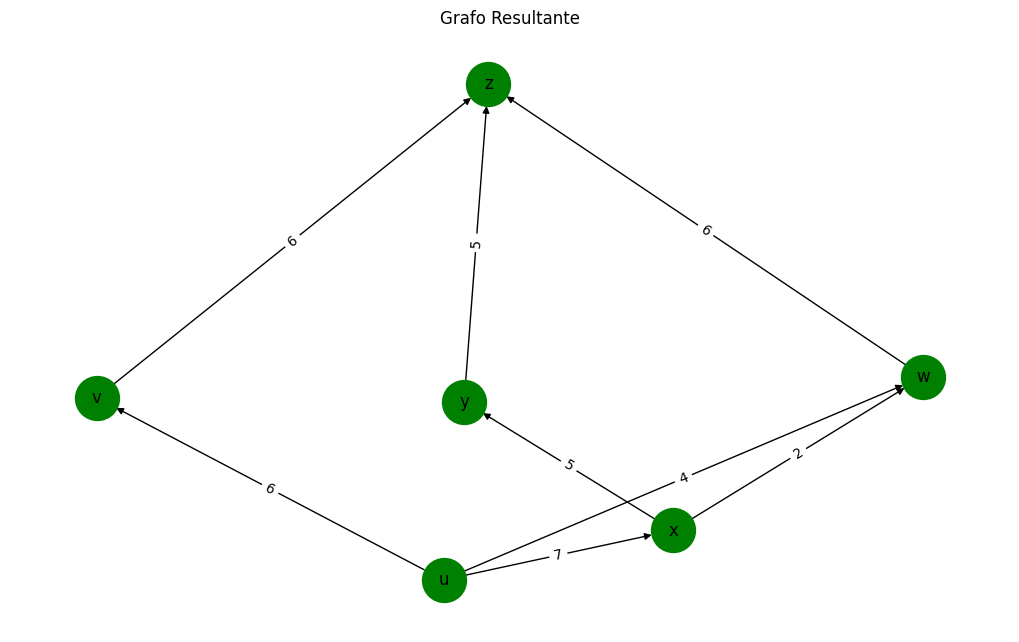

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# El algoritmo utilizado es el algoritmo de flujo máximo (maximum_flow)

G = nx.DiGraph()

rutas = [
    ('u', 'w', 4),
    ('u', 'x', 7),
    ('u', 'v', 10),
    ('w', 'y', 2),
    ('x', 'w', 2),
    ('x', 'y', 10),
    ('x', 'v', 2),
    ('y', 'v', 2),
    ('y', 'z', 7),
    ('v', 'z', 6),
    ('w', 'z', 10)
]

G.add_weighted_edges_from(rutas, weight='capacidad')

posiciones = nx.spring_layout(G, seed=42)

plt.figure(figsize=(10, 6))
nx.draw(G, posiciones, with_labels=True, node_color='blue', edge_color='black', node_size=1000)
etiquetas = nx.get_edge_attributes(G, 'capacidad')
nx.draw_networkx_edge_labels(G, posiciones, edge_labels=etiquetas)
plt.title("Grafo Original")
plt.show()

flujo_total, flujo_por_ruta = nx.maximum_flow(G, 'u', 'z', capacity='capacidad')

print(f"Flujo máximo total desde el puerto U hasta Z: {flujo_total} unidades\n")

print("Rutas marítimas utilizadas con cantidad de mercancías:")
for origen in flujo_por_ruta:
    for destino in flujo_por_ruta[origen]:
        flujo = flujo_por_ruta[origen][destino]
        if flujo > 0:
            print(f"Ruta {origen} → {destino}: {flujo} unidades")

G_flujo = nx.DiGraph()
for origen in flujo_por_ruta:
    for destino, flujo in flujo_por_ruta[origen].items():
        if flujo > 0:
            G_flujo.add_edge(origen, destino, flujo=flujo)

plt.figure(figsize=(10, 6))
nx.draw(G_flujo, posiciones, with_labels=True, node_color='green', edge_color='black', node_size=1000)
etiquetas_flujo = nx.get_edge_attributes(G_flujo, 'flujo')
nx.draw_networkx_edge_labels(G_flujo, posiciones, edge_labels=etiquetas_flujo)
plt.title("Grafo Resultante")
plt.show()